Originally created by Ben Miethig, modified by Elliott Huangfu.

In [1]:
#darkflow folder must be in current directory.
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

%config InlineBackend.figure_format = 'svg'

In [2]:
# Darkflow network config, refer to tutorial by Mark Jay: https://www.youtube.com/watch?v=fSM6cdFQdwI&t=436s

'''options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.3,
}'''
''''gpu': 1.0''' 

options = {
    'model': 'cfg/tiny-yolo-7c.cfg',
    'load': 29250,
    'threshold': 0.2,
    'labels': 'labelsAll.txt'
}

'''  'labels': 'labelsMATLABannotations.txt'  '''
tfnet = TFNet(options)

Parsing cfg/tiny-yolo-7c.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 256)
 Init  |  Ye

In [3]:
# Gather all image filenames

# ImPath = 'C:\\Users\\benmi\\Documents\\Thesis\\Thesis Instructions\\Raw Data\\All_Combined\\Validation\\'
ImPath = '..\\All_Combined\\Validation\\'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(ImPath):
    for file in f:
        if '.jpg' in file:
            #files.append(os.path.join(r, file))
            files.append(file)

len(files)

1181

In [9]:
# Process image, save predictions as csv files.

CSVpath = 'C:\\Users\\benmi\\Documents\\Thesis\\Thesis Instructions\\Raw Data\\Detected_CSV_Results\\'
CSVpath = '..\\All_Combined\\Detected_CSV_Results\\'   # for validation set 

# Save the results to a .csv file or something I can get to later using Matlab
i = 0
print("Processing {:3d} images: ".format(len(files)), end='')
for f in files:
    img = cv2.imread(ImPath+f, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = tfnet.return_predict(img)

    # img.shape
    # results
    
    with open(CSVpath+f[:-4]+'.csv', 'w') as csvFile:
        fields = ['label','confidence','topleft','bottomright']
        writer = csv.DictWriter(csvFile,fieldnames=fields) #,dialect='myDialect')
        writer.writeheader()
        writer.writerows(results)
    
    csvFile.close()
    
    # Display progress
    i += 1
    if i % 100 == 1:
        print("{:3d}, ".format(i), end='')

print('done.')

Processing 1181 images:   1, 101, 201, 301, 401, 501, 601, 701, 801, 901, 1001, 1101, 

**Processing finished.** The following blocks is for demonstration.

{'label': 'PDC',
 'confidence': 0.98319525,
 'topleft': {'x': 147, 'y': 190},
 'bottomright': {'x': 171, 'y': 255}}

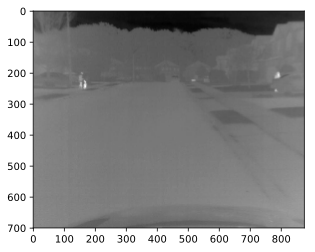

In [25]:
# Let's just display the last image
plt.imshow(img)
plt.show
result

<function matplotlib.pyplot.show(*args, **kw)>

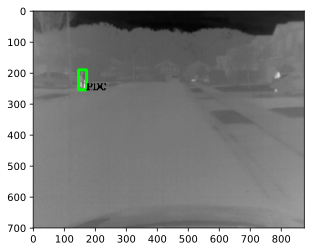

In [26]:
# Now draw the bonding box on original image

colors = [tuple(255 * np.random.rand(3)) for i in range(100)]
for color, result in zip(colors, results):
    
    topleft = (result['topleft']['x'], result['topleft']['y'])
    bottomright = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
    img = cv2.rectangle(img, topleft, bottomright, (0, 255, 0), 7) 
    img = cv2.putText(img, label, bottomright, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)


plt.imshow(img)
plt.show